In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance, to_graphviz

seed = np.random.seed(0)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("hitters.csv")

In [3]:
df

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,#NAME?,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,#NAME?,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,#NAME?,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,#NAME?,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,#NAME?,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [5]:
df.shape

(322, 21)

In [6]:
df.isnull().sum()

Name          0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df['League'].value_counts()

A    175
N    147
Name: League, dtype: int64

In [8]:
df['Division'].value_counts()

W    165
E    157
Name: Division, dtype: int64

In [9]:
df['NewLeague'].value_counts()

A    176
N    146
Name: NewLeague, dtype: int64

In [10]:
df = df.drop(['Name','League','Division','NewLeague'], axis=1)

In [11]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [12]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [13]:
df['Salary'].fillna(value=536.00,inplace=True)

In [14]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,536.0
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [15]:
df.isnull().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

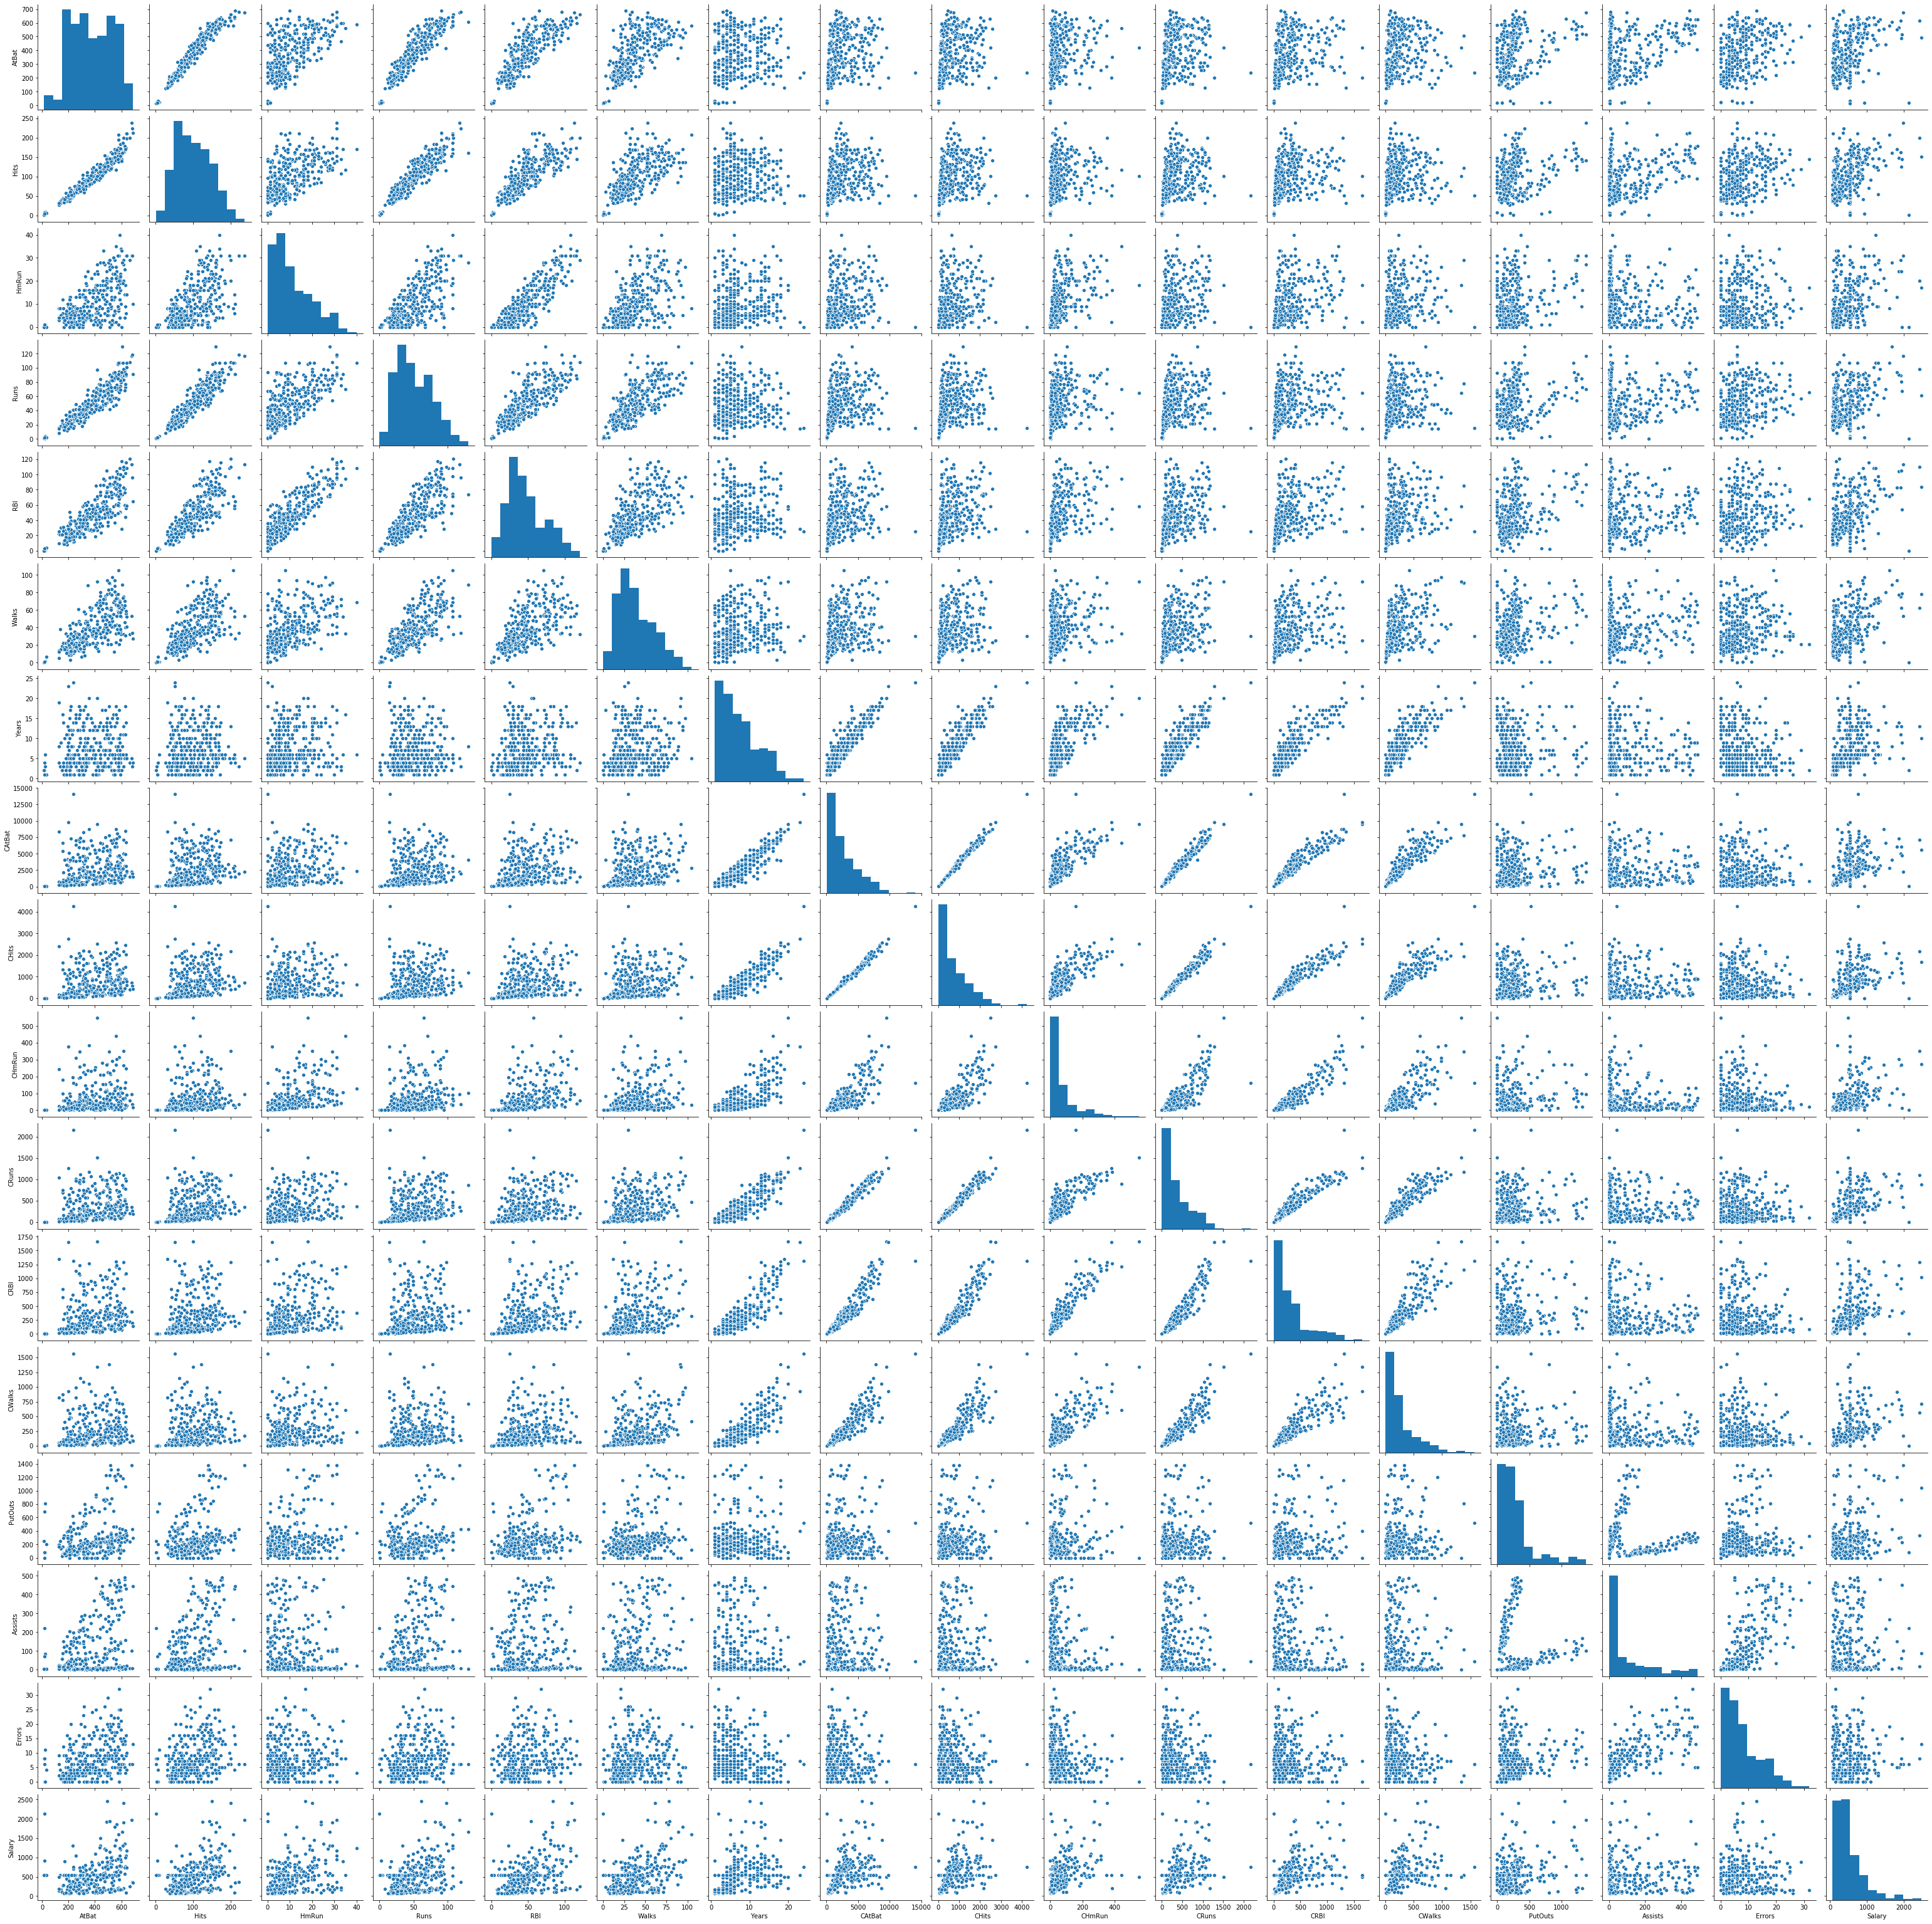

In [16]:
sns.pairplot(df)
plt.show()

In [17]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.342452
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.384952
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.311600
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.372235
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.401627
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.402449
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.352239
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.467635
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.491151
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.451876


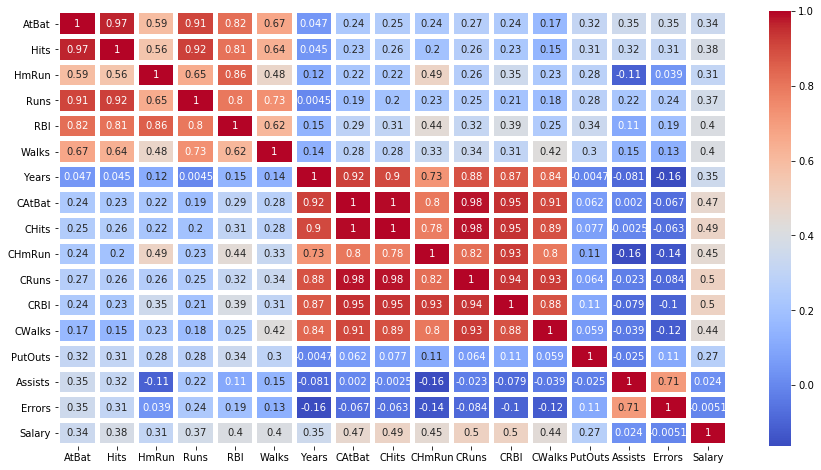

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(),cmap="coolwarm",annot=True,linewidths=4,fmt='.2g')
plt.show()

In [30]:
df.shape

(322, 17)

In [32]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [35]:
X.values, y.values

(array([[ 293,   66,    1, ...,  446,   33,   20],
        [ 315,   81,    7, ...,  632,   43,   10],
        [ 479,  130,   18, ...,  880,   82,   14],
        ...,
        [ 475,  126,    3, ...,   37,  113,    7],
        [ 573,  144,    9, ..., 1314,  131,   12],
        [ 631,  170,    9, ...,  408,    4,    3]], dtype=int64),
 array([ 536.   ,  475.   ,  480.   ,  500.   ,   91.5  ,  750.   ,
          70.   ,  100.   ,   75.   , 1100.   ,  517.143,  512.5  ,
         550.   ,  700.   ,  240.   ,  536.   ,  775.   ,  175.   ,
         536.   ,  135.   ,  100.   ,  115.   ,  536.   ,  600.   ,
         776.667,  765.   ,  708.333,  750.   ,  625.   ,  900.   ,
         536.   ,  110.   ,  536.   ,  612.5  ,  300.   ,  850.   ,
         536.   ,   90.   ,  536.   ,  536.   ,   67.5  ,  536.   ,
         536.   ,  180.   ,  536.   ,  305.   ,  215.   ,  247.5  ,
         536.   ,  815.   ,  875.   ,   70.   ,  536.   , 1200.   ,
         675.   ,  415.   ,  340.   ,  536.   ,  416.6

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [44]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed,n_estimators=500)

In [45]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric=['rmse'],early_stopping_rounds=10)

[0]	validation_0-rmse:640.987
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:597.571
[2]	validation_0-rmse:562.879
[3]	validation_0-rmse:527.213
[4]	validation_0-rmse:498.619
[5]	validation_0-rmse:474.729
[6]	validation_0-rmse:457.193
[7]	validation_0-rmse:443.328
[8]	validation_0-rmse:428.949
[9]	validation_0-rmse:416.226
[10]	validation_0-rmse:404.24
[11]	validation_0-rmse:394.817
[12]	validation_0-rmse:387.178
[13]	validation_0-rmse:379.917
[14]	validation_0-rmse:373.772
[15]	validation_0-rmse:369.765
[16]	validation_0-rmse:365.928
[17]	validation_0-rmse:362.468
[18]	validation_0-rmse:360.731
[19]	validation_0-rmse:358.081
[20]	validation_0-rmse:354.751
[21]	validation_0-rmse:352.926
[22]	validation_0-rmse:351.38
[23]	validation_0-rmse:349.526
[24]	validation_0-rmse:349.873
[25]	validation_0-rmse:347.946
[26]	validation_0-rmse:345.625
[27]	validation_0-rmse:345.844
[28]	validation_0-rmse:344.382
[29]	validation_0-rmse:343.727
[30]	validation_0

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [46]:
ypred = xgbmodel.predict(X_test)

In [47]:
ypred

array([ 530.51697,  269.43637,  278.4095 ,  460.78677,  708.36395,
        578.12524,  442.50082,  591.544  ,  387.18823,  548.75574,
        471.48706,  846.77765,  995.09186,  766.7972 ,  232.67479,
        444.18912,  531.2883 ,  539.2918 ,  546.4969 ,  475.72598,
        778.0316 ,  287.2075 ,  505.99957,  606.7883 ,  303.7097 ,
        896.62115,  128.93762,  284.25616, 1035.2827 ,  862.1359 ,
        478.97455,  171.35648,  590.6191 ,  165.18236,  317.26184,
        549.8138 ,  259.97925,  807.3715 ,  302.614  ,  776.0073 ,
        356.19498,  826.8579 ,  637.2175 ,  839.5504 ,  469.19238,
        363.82803,  360.47406,  774.5161 ,  416.87302,  516.41595,
        197.9515 ,  247.67157,  460.20874,  416.95706,  532.78296,
        438.84692,  272.47244,  460.46802,  687.8793 , 1193.4896 ,
        734.82385,  177.91106,  496.58142,  747.45496,  677.0229 ],
      dtype=float32)

In [48]:
mse = mean_squared_error(y_test,ypred)
mse

111649.96858506631

In [49]:
np.sqrt(mse)

334.1406419235264

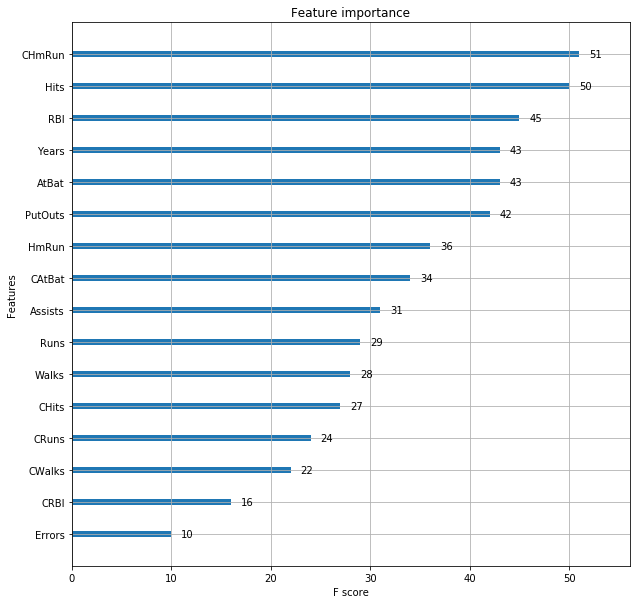

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

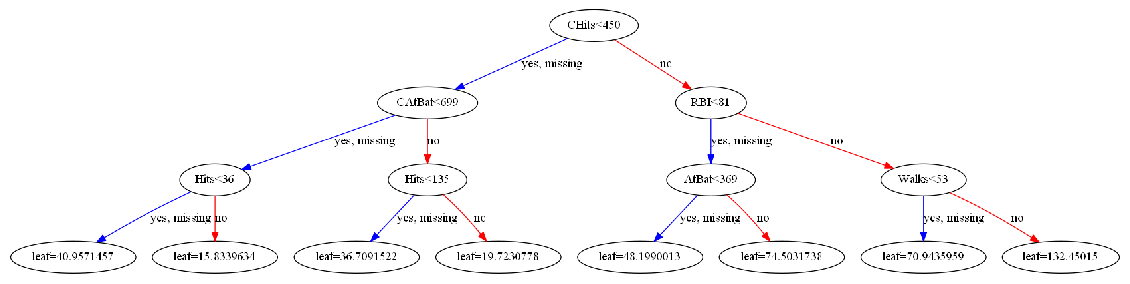

In [51]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

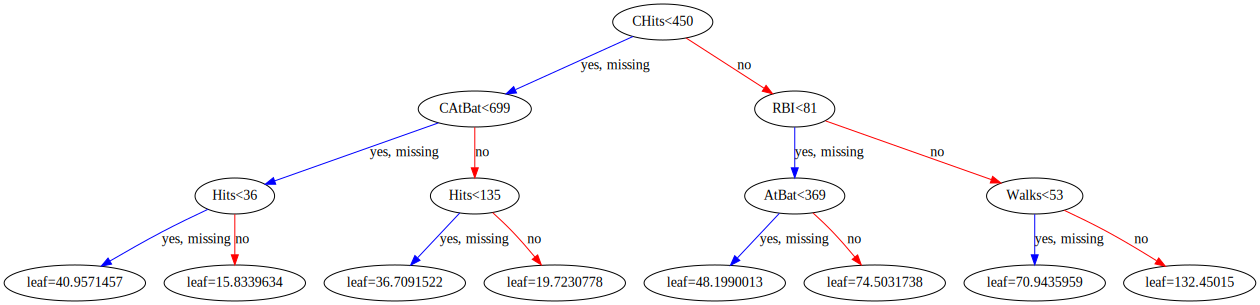

In [52]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)

In [54]:
r2_score(y_test,ypred)

0.30816299157172433